# <center>Визуализация</center>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
import matplotlib.pyplot as plt

In [4]:
df_xl = pd.read_excel('test.xls', sheetname="Data" ,dtype={ '_5000': float})
df_xl = df_xl.drop(['_10','_50','_100','_500','_1000'], axis=1)

In [5]:
df_xl.reset_index(inplace=True)
df_xl['Date'] = pd.to_datetime(df_xl['DATE'])
df_xl = df_xl.set_index('DATE')

In [6]:
decomposition = seasonal_decompose(df_xl._5000, freq=12) # decomposition of initial data as ts

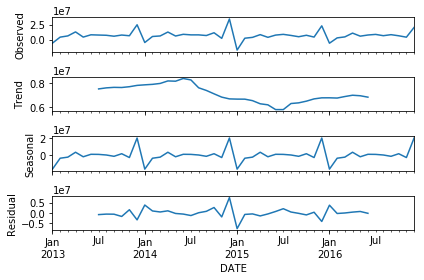

In [7]:
decomposition.plot()

# <center>Стационарность</center>

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

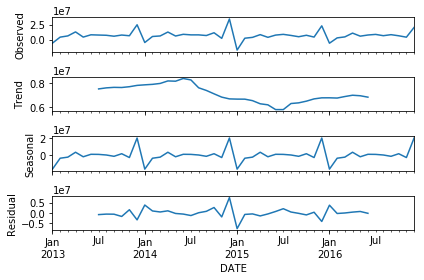

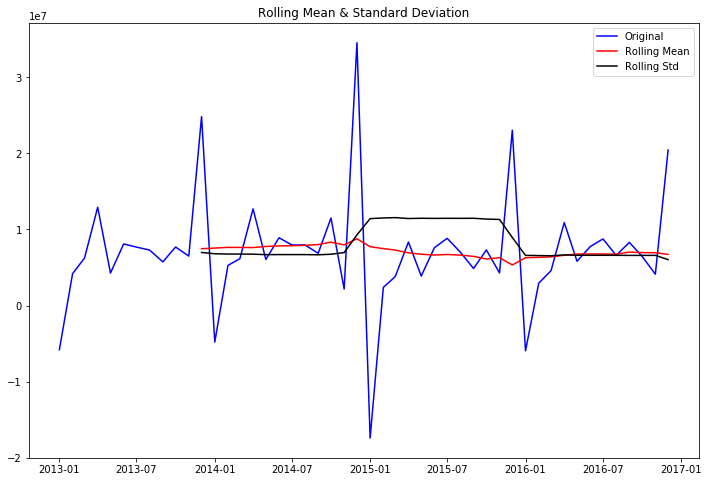

Results of Dickey-Fuller Test:
Test Statistic                 -3.835828
p-value                         0.002561
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [10]:
test_stationarity(df_xl._5000)

### <span style="text-decoration: underline;">Т.о., ряд стационарный</span>

# <center>PACF/ACF</center>

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [12]:
decomposition.resid = decomposition.resid.fillna(0.0)

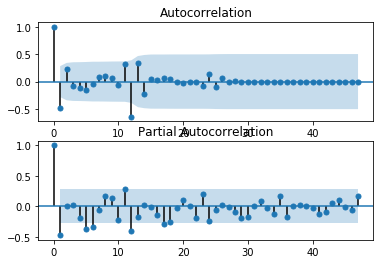

In [32]:
plt.subplot(211)
plot_acf(decomposition.resid, ax=plt.gca())
plt.subplot(212)
plot_pacf(decomposition.resid, ax=plt.gca())
plt.show()

# <center>ARIMA1</center>

### <center>Настройка по полученным через ACF/PACF параметрам</center>

In [14]:
from statsmodels.tsa.arima_model import ARIMA

In [17]:
model = ARIMA(df_xl._5000[:-12], order=(2,0,2))
model_fit = model.fit(disp=0)

In [24]:
output_ARIMA1 = model_fit.forecast(steps=12)[0]

In [21]:
from sklearn.metrics import mean_squared_error as mse

In [27]:
for i in range(len(output_ARIMA1)):
    print('Predicted: '+str(output_ARIMA1[i])+'; Expected: '+str(df_xl._5000[i-12]))
print('MSE is: '+str(mse(output_ARIMA1,df_xl._5000[-12:])))

Predicted: 506012.346432; Expected: -5956345.0
Predicted: 8835085.07903; Expected: 2928645.0
Predicted: 3128964.82344; Expected: 4588335.0
Predicted: 10095830.8727; Expected: 10914205.0
Predicted: 3734961.51681; Expected: 5819945.0
Predicted: 10387104.5824; Expected: 7750460.0
Predicted: 3874970.74079; Expected: 8758015.0
Predicted: 10454396.266; Expected: 6595085.0
Predicted: 3907320.52899; Expected: 8303250.0
Predicted: 10469940.2523; Expected: 6459850.0
Predicted: 3914797.21465; Expected: 4115055.0
Predicted: 10473528.7069; Expected: 20452525.0
MSE is: 2.20425449844e+13


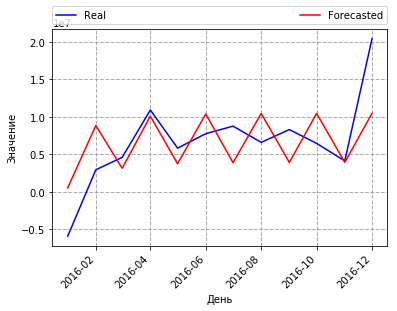

In [30]:
plt.plot(df_xl.index[-12:],df_xl._5000[-12:], color='b', label='Real')
plt.plot(df_xl.index[-12:],output_ARIMA1, color='r', label='Forecasted')
plt.grid(color='#999999', linestyle='dashed', linewidth=1, alpha=0.8)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('День')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Значение')
plt.show()

### <center>Тестирование других вариантов</center>

In [75]:
model = ARIMA(df_xl._5000[:-12], order=(4,0,5))
model_fit = model.fit(disp=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [76]:
output_ARIMA1 = model_fit.forecast(steps=12)[0]

In [77]:
for i in range(len(output_ARIMA1)):
    print('Predicted: '+str(output_ARIMA1[i])+'; Expected: '+str(df_xl._5000[i-12]))
print('MSE is: '+str(mse(output_ARIMA1,df_xl._5000[-12:])))

Predicted: 856073.36483; Expected: -5956345.0
Predicted: 7831364.53413; Expected: 2928645.0
Predicted: 6201015.90643; Expected: 4588335.0
Predicted: 5866002.90846; Expected: 10914205.0
Predicted: 5898535.55956; Expected: 5819945.0
Predicted: 5552503.67654; Expected: 7750460.0
Predicted: 6352362.22793; Expected: 8758015.0
Predicted: 6844052.69611; Expected: 6595085.0
Predicted: 7379907.84236; Expected: 8303250.0
Predicted: 8106799.67276; Expected: 6459850.0
Predicted: 8242105.34289; Expected: 4115055.0
Predicted: 8328516.15635; Expected: 20452525.0
MSE is: 2.30671887049e+13


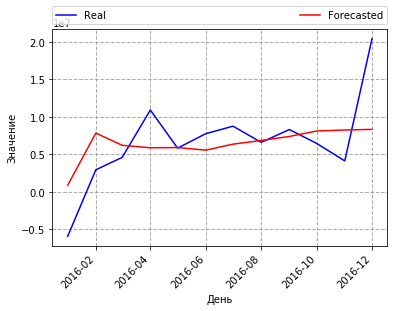

In [78]:
plt.plot(df_xl.index[-12:],df_xl._5000[-12:], color='b', label='Real')
plt.plot(df_xl.index[-12:],output_ARIMA1, color='r', label='Forecasted')
plt.grid(color='#999999', linestyle='dashed', linewidth=1, alpha=0.8)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('День')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Значение')
plt.show()

- (3,1,2) - очень плохо, слишком далеко от реального;
- (2,0,3) - очень плохо, прямая линия;
- (1,0,1) - очень плохо, прямая линия;
- (2,0,1) - очень плохо, прямая линия;
- (1,1,2) - очень плохо, слишком далеко от реального;
- (5,0,4) - плохо, в целом повторяет движение ряда, но очень криво;
- (4,0,2) - очень плохо, прямая линия;
- (4,0,5) - очень плохо, практикчески прямая линия;

### <span style="color:red;">Таким образом, лучшая ARIMA, что ожидаемо, построена с помощью ACF/PACF</span>

# <center>ARIMA2</center>

In [81]:
train_data = df_xl[:-12]
test_data = df_xl[-12:]

#### Имеется 3 тренировочных года

In [90]:
amount_of_train_years = 3

In [110]:
# generating test data for second ARIMA
train_jan = pd.DataFrame()
train_feb = pd.DataFrame()
train_mar = pd.DataFrame()
train_apr = pd.DataFrame()
train_may = pd.DataFrame()
train_jun = pd.DataFrame()
train_jul = pd.DataFrame()
train_aug = pd.DataFrame()
train_sep = pd.DataFrame()
train_oct = pd.DataFrame()
train_nov = pd.DataFrame()
train_dec = pd.DataFrame()

for i in range(amount_of_train_years):
    train_jan = train_jan.append(df_xl.ix[0+i*12])
    train_feb = train_feb.append(df_xl.ix[1+i*12])
    train_mar = train_mar.append(df_xl.ix[2+i*12])
    train_apr = train_apr.append(df_xl.ix[3+i*12])
    train_may = train_may.append(df_xl.ix[4+i*12])
    train_jun = train_jun.append(df_xl.ix[5+i*12])
    train_jul = train_jul.append(df_xl.ix[6+i*12])
    train_aug = train_aug.append(df_xl.ix[7+i*12])
    train_sep = train_sep.append(df_xl.ix[8+i*12])
    train_oct = train_oct.append(df_xl.ix[9+i*12])
    train_nov = train_nov.append(df_xl.ix[10+i*12])
    train_dec = train_dec.append(df_xl.ix[11+i*12])

In [111]:
decomposition = seasonal_decompose(train_jan._5000, freq=1)

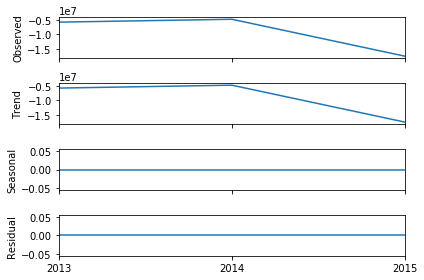

In [112]:
decomposition.plot()

In [113]:
decomposition.resid = decomposition.resid.fillna(0.0)

#### Результат очевиден, но всё равно проверим:

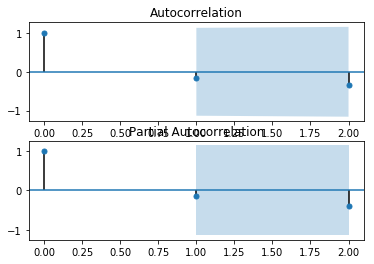

In [116]:
plt.subplot(211)
plot_acf(train_mar._5000, ax=plt.gca())
plt.subplot(212)
plot_pacf(train_mar._5000, ax=plt.gca())
plt.show()

#### Ничего удивительного не получили

In [118]:
import numpy as np

In [195]:
arima2_result = np.array([])

In [166]:
arima2_train_data = [[train_jan], 
                     [train_feb], 
                     [train_mar], 
                     [train_apr], 
                     [train_may], 
                     [train_jun], 
                     [train_jul], 
                     [train_aug], 
                     [train_sep],
                     [train_oct],
                     [train_nov],
                     [train_dec]
                    ]

In [196]:
for i in range(12):
    model2 = ARIMA(arima2_train_data[i][0]._5000, order=(1,0,0))
    model_fit2 = model2.fit(disp=0)
    arima2_month_forecast = model_fit2.forecast(steps=1)[0]
    arima2_result = np.append(arima2_result,arima2_month_forecast)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [197]:
arima2_result = np.nan_to_num(arima2_result)

In [198]:
for i in range(len(arima2_result)):
    print('Predicted: '+str(arima2_result[i])+'; Expected: '+str(df_xl._5000[i-12]))
print('MSE is: '+str(mse(arima2_result,df_xl._5000[-12:])))

Predicted: -6270341.61581; Expected: -5956345.0
Predicted: 0.0; Expected: 2928645.0
Predicted: 5889515.0706; Expected: 4588335.0
Predicted: 12220548.9851; Expected: 10914205.0
Predicted: 6229636.75087; Expected: 5819945.0
Predicted: 9156483.28738; Expected: 7750460.0
Predicted: 8878415.60285; Expected: 8758015.0
Predicted: 0.0; Expected: 6595085.0
Predicted: 7156937.3076; Expected: 8303250.0
Predicted: 0.0; Expected: 6459850.0
Predicted: 3584022.29246; Expected: 4115055.0
Predicted: 0.0; Expected: 20452525.0
MSE is: 4.32800850246e+13


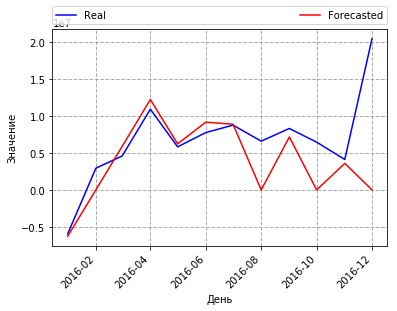

In [199]:
plt.plot(df_xl.index[-12:],df_xl._5000[-12:], color='b', label='Real')
plt.plot(df_xl.index[-12:],arima2_result, color='r', label='Forecasted')
plt.grid(color='#999999', linestyle='dashed', linewidth=1, alpha=0.8)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('День')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Значение')
plt.show()

#### При таком количестве данных модель более высокого порядка библиотека создать не позволяет

# <center>Комбинация</center>

$$
\begin{cases}
Z = \alpha*ARIMA1+\beta*ARIMA2;
\\\alpha+\beta = 1;
\\\alpha \geqslant 0, \beta \geqslant 0.
\end{cases}
\\
\implies
\\
\\
\alpha = \frac{Z-ARIMA2}{ARIMA1-ARIMA2};
$$

In [200]:
z = df_xl._5000[-12:]
arima1 = output_ARIMA1
arima2 = arima2_result

In [207]:
alpha_12 = np.array([])

In [208]:
for i in range(12):
    alpha_12 = np.append(alpha_12,np.array([(z[i]-arima2[i])/(arima1[i]-arima2[i])]))

#### Возьмём среднее

In [210]:
alpha_12 = alpha_12[(alpha_12 <= 1.0) & (alpha_12 >= 0.0)]

In [216]:
alpha = np.mean(alpha_12)

In [218]:
beta = 1. - alpha

In [219]:
print('Alpha and beta is: '+str(alpha)+'; '+str(beta))

Alpha and beta is: 0.366982960408; 0.633017039592


#### Непосредственно прогноз

In [220]:
final_forecast = np.array([])

In [221]:
for i in range(12):
    final_forecast = np.append(final_forecast, alpha*arima1[i]+beta*arima2[i])

In [222]:
for i in range(len(final_forecast)):
    print('Predicted: '+str(final_forecast[i])+'; Expected: '+str(df_xl._5000[i-12]))
print('MSE is: '+str(mse(final_forecast,df_xl._5000[-12:])))

Predicted: -3655068.74912; Expected: -5956345.0
Predicted: 2873977.34077; Expected: 2928645.0
Predicted: 6003830.56951; Expected: 4588335.0
Predicted: 9888538.85386; Expected: 10914205.0
Predicted: 6108128.25548; Expected: 5819945.0
Predicted: 7833884.18055; Expected: 7750460.0
Predicted: 7951397.05717; Expected: 8758015.0
Predicted: 2511650.71961; Expected: 6595085.0
Predicted: 7238763.69453; Expected: 8303250.0
Predicted: 2975057.34334; Expected: 6459850.0
Predicted: 5293459.40013; Expected: 4115055.0
Predicted: 3056423.51486; Expected: 20452525.0
MSE is: 2.85882876386e+13


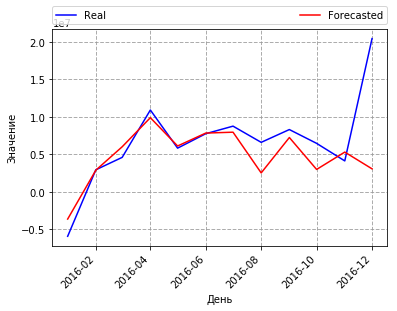

In [223]:
plt.plot(df_xl.index[-12:],df_xl._5000[-12:], color='b', label='Real')
plt.plot(df_xl.index[-12:],final_forecast, color='r', label='Forecasted')
plt.grid(color='#999999', linestyle='dashed', linewidth=1, alpha=0.8)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, mode="expand", borderaxespad=0.)
plt.xlabel('День')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Значение')
plt.show()